<a href="https://colab.research.google.com/github/c-daly/Notebooks/blob/main/CDaly_CS6140_Assignment_4_Summer22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS6140 - Machine Learning: Assignment 4 
(Total Points: 100)
## Prof. Ahmad Uzair 

# Q1. Expectation Maximization (25 Points)

Etimate the probability distribution in a 1-dimensional dataset
There are two Normal distributions  𝑁(𝜇1,𝜎1^2) and 𝑁(𝜇2,𝜎2^2).

There are 5 paramaters to estimate: $𝜃=(𝑤, 𝜇1, 𝜎_1^2, 𝜇2,𝜎_2^2)$ where 𝑤 is the probability that the data comes from the first normal probability distribution and (1-𝑤) comes from the second normal probability distribution.

The probability density function (PDF) of the mixture model is: $𝑓(𝑥|𝜃)=𝑤 𝑓1(𝑥 | 𝜇1,𝜎_1^2)+(1−𝑤) 𝑓2(𝑥 | 𝜇2,𝜎_2^2)$
Your goal is to best fit a given probability density by finding $𝜃=(𝑤,𝜇1,𝜎_1^2,𝜇2,𝜎_2^2)$ through EM iterations.

Using the following way to produce data:

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

random_seed=36788765
np.random.seed(random_seed)

Mean1 = 2.0  # Input parameter, mean of first normal probability distribution
Standard_dev1 = 4.0 #@param {type:"number"}
Mean2 = 9.0 # Input parameter, mean of second normal  probability distribution
Standard_dev2 = 2.0 #@param {type:"number"}

# generate data
y1 = np.random.normal(Mean1, Standard_dev1, 1000)
y2 = np.random.normal(Mean2, Standard_dev2, 500)

# Combine the data for fitting a single gaussian
data=np.append(y1,y2)
combined_mean = np.mean(data)
combined_std = np.std(data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


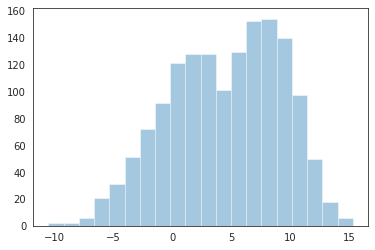

In [18]:
# import libraries

# For plotting
sns.set_style("white")
#for matrix math
import numpy as np
#for normalization + probability density function computation
from scipy import stats
#for data preprocessing
import pandas as pd
from math import sqrt, log, exp, pi
from random import uniform
random_seed=36788765
np.random.seed(random_seed)

Mean1 = 2.0  # Input parameter, mean of first normal probability distribution
Standard_dev1 = 4.0 #@param {type:"number"}
Mean2 = 9.0 # Input parameter, mean of second normal  probability distribution
Standard_dev2 = 2.0 #@param {type:"number"}

# generate data
y1 = np.random.normal(Mean1, Standard_dev1, 1000)
y2 = np.random.normal(Mean2, Standard_dev2, 500)
data=np.append(y1,y2)

# For data visiualisation calculate left and right of the graph
Min_graph = min(data)
Max_graph = max(data)
x = np.linspace(Min_graph, Max_graph, 2000)

sns.distplot(data, bins=20, kde=False)

(1) Using a single Gaussion to estimate and create a plot to see the result: (10 points)


In [19]:
class Gaussian:
    "Model univariate Gaussian"
    def __init__(self, mu, sigma):
        #mean and standard deviation
        self.mu = mu
        self.sigma = sigma
        self.rv = stats.norm(mu, sigma)

    #probability density function
    def pdf(self, x):
        u = (x - self.mu) / abs(self.sigma)
        y = (1 / (sqrt(2 * pi) * abs(self.sigma))) * exp(-u * u / 2)
        #return self.rv.pdf(x)
        return y



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


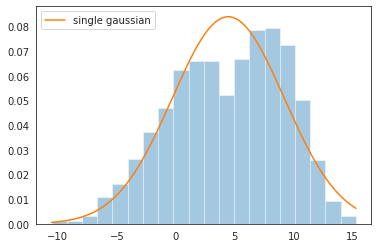

In [29]:
#gaussian of best fit
single = Gaussian(np.mean(data), np.std(data))
density = stats.norm(single.mu, single.sigma).pdf(x)
sns.distplot(data, bins=20, kde=False, norm_hist=True);
plt.plot(x, density, label='single gaussian');
plt.legend()

(2) Using a 2 Gaussian mixture model to estimate and create a plot to see the result(Do not use sklearn GaussianMixture): (15 points)


In [30]:
class GaussianMixture:
  def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=1, sigma_max=1, mix=.5):
    self.data = data
    self.g1 = Gaussian(uniform(mu_min, mu_max), 
                        uniform(sigma_min, sigma_max))
    self.g2 = Gaussian(uniform(mu_min, mu_max), 
                        uniform(sigma_min, sigma_max))
    
    self.pi = mix

  def Estep(self):
    # compute weights
    self.loglike = 0. # = log(p = 1)
    for datum in self.data:  
      # unnormalized weights
      w1 = self.g1.pdf(datum) * self.pi
      w2 = self.g2.pdf(datum) * (1. - self.pi)
      
      # compute denominator
      summed_weights = w1 + w2

      # normalize
      w1 /= summed_weights   
      w2 /= summed_weights

      # add into loglike
      self.loglike += log(summed_weights) #freshening up self.loglike in the process

      # yield weight tuple
      yield (w1, w2)

  def Mstep(self, weights):
    (w1, w2) = zip(*weights) 
    sum_one = sum(w1)
    sum_two = sum(w2)

    # compute new means
    self.g1.mu = np.dot(w1, data)/sum_one
    self.g2.mu = np.dot(w2, data)/sum_two

    x_minus_g1_mu = data - self.g1.mu 
    x_minus_g2_mu = data - self.g2.mu 

    # compute new sigmas
    self.g1.sigma = np.sqrt(np.dot(w1, np.square(x_minus_g1_mu))/sum_one)
    self.g2.sigma = np.sqrt(np.dot(w2, np.square(x_minus_g2_mu))/sum_two)

    # compute new pi
    self.pi = sum_one / len(data)

      
  def iterate(self, N=1):
    for i in range(1, N+1):
        self.Mstep(self.Estep())
    self.Estep()

  def pdf(self, x):
    return (self.pi)*self.g1.pdf(x) + (1-self.pi)*self.g2.pdf(x)


Computing best model with random restarts...



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


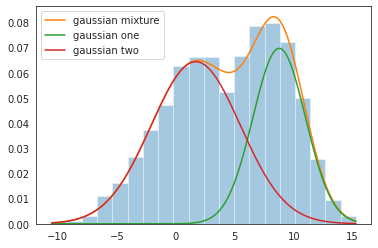

In [31]:
# Find best Mixture Gaussian model
n_iterations = 100
n_random_restarts = 1
best_mix = None
best_loglike = float('-inf')
print('Computing best model with random restarts...\n')
mix = GaussianMixture(data)
for _ in range(n_iterations):
    mix.iterate()
    if mix.loglike > best_loglike:
        best_loglike = mix.loglike
        best_mix = mix

# plot mix and original gaussians
sns.distplot(data, bins=20, kde=False, norm_hist=True);
g_both = [best_mix.pdf(e) for e in x]
plt.plot(x, g_both, label='gaussian mixture');
g_left = [best_mix.g1.pdf(e) * best_mix.pi for e in x]
plt.plot(x, g_left, label='gaussian one');
g_right = [best_mix.g2.pdf(e) * (1-best_mix.pi) for e in x]
plt.plot(x, g_right, label='gaussian two');
plt.legend()

# Q2. (65 Points)
Comparison for Logistic Regression model: before and after PCA.
Consider dataset.csv.
Please follow the following steps:

  1. Standardize the disease classification dataset (dataset.csv). You can use StandardScaler of sklearn. (5 points)
  2. Split the data in 80-20 train-val sets. Apply Eigen-decomposition using PCA **only** on train set. You can use externel libaries such as numpy (Ref np.linalg.eig) (10 points)
  3. Selection first 6 component loadings with the highest variance-explanation) (10 points)
  4. Project train set in the new 6-dimensional feature space using eigen vectors selected in step 3. (10 points)
  5. Train two logistic regression models. One for the standardized (all features) and second for the transformed data (6-features). Report train-sets (standardized and transformed) ROC curves for both models. (10 Points)
  6. Validate the model using val set. Project val set in the new 6-dimensional feature space using eigen vectors selected in step 3. Predict target variable using the models trained in step 5. (10 Points)
  7. Compare the logistic regression models before and after PCA using ROC curve. (5 points)

Load and standardize the data

In [37]:
import pandas as pd

from sklearn.preprocessing import StandardScaler

label_column = 'class'
data = pd.read_csv('dataset.csv')
print(data.head())
#data = data.drop('id', axis=1)
X = data.drop(label_column, axis=1)
y = data[label_column]



   id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0   0       1  0.85247  0.71826  0.57227        240               239   
1   0       1  0.76686  0.69481  0.53966        234               233   
2   0       1  0.85083  0.67604  0.58982        232               231   
3   1       0  0.41121  0.79672  0.59257        178               177   
4   1       0  0.32790  0.79782  0.53028        236               235   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0          0.008064            0.000087       0.00218  ...   
1          0.008258            0.000073       0.00195  ...   
2          0.008340            0.000060       0.00176  ...   
3          0.010858            0.000183       0.00419  ...   
4          0.008162            0.002669       0.00535  ...   

   tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
0                     1.5620                     2.6445   
1                     1.5589                     3.6107   
2          

Split

In [38]:
from sklearn.model_selection import train_test_split

label_column = 'class'

scaler = StandardScaler()
print(X.head())
X_scaled = scaler.fit_transform(X)

print(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = .8)

   id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0   0       1  0.85247  0.71826  0.57227        240               239   
1   0       1  0.76686  0.69481  0.53966        234               233   
2   0       1  0.85083  0.67604  0.58982        232               231   
3   1       0  0.41121  0.79672  0.59257        178               177   
4   1       0  0.32790  0.79782  0.53028        236               235   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0          0.008064            0.000087       0.00218  ...   
1          0.008258            0.000073       0.00195  ...   
2          0.008340            0.000060       0.00176  ...   
3          0.010858            0.000183       0.00419  ...   
4          0.008162            0.002669       0.00535  ...   

   tqwt_kurtosisValue_dec_27  tqwt_kurtosisValue_dec_28  \
0                     1.5466                     1.5620   
1                     1.5530                     1.5589   
2          

Perform eigenvalue decomposition

Select

In [39]:
import numpy as np

num_pcas = 6

def pca_eigen(X, num_components):
  cov_matrix = np.cov(X.T)
  eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
  explained_variances = []
  for i in range(len(eigenvalues)):
    ev = eigenvalues[i] / np.sum(eigenvalues)
    explained_variances.append(eigenvalues[i] / np.sum(eigenvalues))
  return (eigenvalues, eigenvectors, explained_variances)

X_centered = X_train - np.mean(X_train, axis = 0)
vals, vectors, variances = pca_eigen(X_centered, num_pcas)
sorted_indices = np.argsort(vals)[::-1]
sorted_eigenvalues = vals[sorted_indices]
sorted_eigenvectors = vectors[:, sorted_indices]
truncated_eigenvectors = sorted_eigenvectors[:,0:num_pcas]

# project data into new space
X_reduced = np.dot(truncated_eigenvectors.T, X_centered.T).T


Train, evaluate, display results

Regular training data


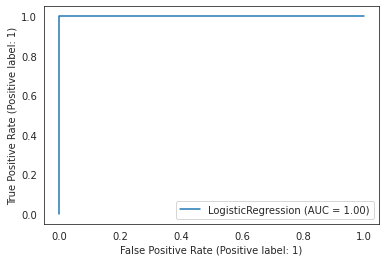

              precision    recall  f1-score   support

           0       0.65      0.69      0.67        35
           1       0.90      0.89      0.90       117

    accuracy                           0.84       152
   macro avg       0.78      0.79      0.78       152
weighted avg       0.85      0.84      0.84       152

[[ 24  11]
 [ 13 104]]
Reduced training data


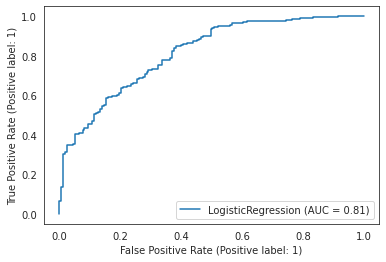

              precision    recall  f1-score   support

           0       0.76      0.54      0.63        35
           1       0.87      0.95      0.91       117

    accuracy                           0.86       152
   macro avg       0.82      0.75      0.77       152
weighted avg       0.85      0.86      0.85       152

[[ 19  16]
 [  6 111]]
PCA test data



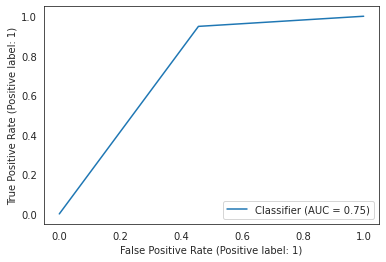

Regular test data



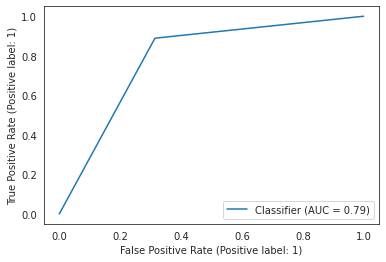

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# added max_iter because of warning I was receiving
# that I suspect was related to the shape of the data.
# Didn't have to add the parameter fitting the pca data.
# Normal data for classifier
clf = LogisticRegression(max_iter=10000000)
clf.fit(X_train, y_train)

print(f"Regular training data")
RocCurveDisplay.from_estimator(clf, X_train, y_train)
plt.show()
# test
y_pred = clf.predict(X_test)

# test evaluation for normal data
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# training on reduced dataset
clf1 = LogisticRegression()
clf1.fit(X_reduced, y_train)

print(f"Reduced training data")
RocCurveDisplay.from_estimator(clf1, X_reduced, y_train)
plt.show()

# test evaluation for reduced data
test_reduced = np.dot(truncated_eigenvectors.T, X_test.T).T
y_pred_pca = clf1.predict(test_reduced)
print(classification_report(y_test, y_pred_pca))
print(confusion_matrix(y_test, y_pred_pca))

print(f"PCA test data\n")
RocCurveDisplay.from_predictions(y_test, y_pred_pca)
plt.show()
print(f"Regular test data\n")
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

# Q3. (10 Points)
Outlier Detection using Z-score. (10 points)
You are given a Heights and Weights Dataset and a threshold 1. Calculate the number of outliar and show the first 5 of them.


In [44]:
# data heights and weights
threshold = 1
df = pd.read_csv('HeightWeight.csv')
df.head()

# get height mean and variance
mean_height = df['Height(Inches)'].mean()
std_height = df['Height(Inches)'].std() 

# get weight mean and variance
mean_weight = df['Weight(Pounds)'].mean()
std_weight = df['Weight(Pounds)'].std() 

# calculate 3 standard deviations
left_height = mean_height - std_height * 3
right_height = mean_height + std_height * 3

left_weight = mean_weight - std_weight * 3
right_weight = mean_weight + std_weight * 3

# Find values greater than 3 standard deviations
df_cleaned_height = df[(df['Height(Inches)'] >= left_height) &  (df['Height(Inches)'] <= right_height)]
df_cleaned_height_weight = df_cleaned_height[ (df_cleaned_height['Weight(Pounds)'] >= left_weight) & (df_cleaned_height['Weight(Pounds)'] <= right_weight)]

# calculate the cleaned mean and variance
mean = df_cleaned_height_weight['Height(Inches)'].mean()
std = df_cleaned_height_weight['Height(Inches)'].std()

# apply thresholds and display outliers
df_cleaned_height_weight['zscore_height'] = (df_cleaned_height_weight['Height(Inches)'] - mean)/std
outliers = df_cleaned_height_weight[np.abs(df_cleaned_height_weight['zscore_height']) > threshold]
outliers = outliers.sort_values(by=['zscore_height'])
print(f"outliers: {outliers[:5]}")
print(f"total: {len(outliers)}")

outliers:        Index  Height(Inches)  Weight(Pounds)  zscore_height
6917    6918        62.29058        100.3800      -3.036965
8864    8865        62.35553        102.9535      -3.002359
23041  23042        62.37478        129.2900      -2.992103
15828  15829        62.37781        124.7478      -2.990489
15279  15280        62.38539        105.2355      -2.986450
total: 7989


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
